# Importing the dependencies

In [8]:

%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
from IPython.display import display
from sklearn.model_selection import train_test_split

# Importing the dataset

In [9]:
celeba_dataset = pd.read_csv(
    '/Users/lucio.nogales/Documents/Master-degree-projects/Pattern recognition project/data/celeba-dataset/list_attr_celeba.txt',
    delim_whitespace=True,)

/var/folders/dy/7208831x73jbhnb8lyw0p9lr0000gq/T/ipykernel_81904/1864921727.py:1: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  celeba_dataset = pd.read_csv(


# Exploring the dataset

In [11]:
celeba_dataset.shape

(202599, 40)

In [12]:
celeba_dataset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 202599 entries, 000001.jpg to 202599.jpg
Data columns (total 40 columns):
 #   Column               Non-Null Count   Dtype
---  ------               --------------   -----
 0   5_o_Clock_Shadow     202599 non-null  int64
 1   Arched_Eyebrows      202599 non-null  int64
 2   Attractive           202599 non-null  int64
 3   Bags_Under_Eyes      202599 non-null  int64
 4   Bald                 202599 non-null  int64
 5   Bangs                202599 non-null  int64
 6   Big_Lips             202599 non-null  int64
 7   Big_Nose             202599 non-null  int64
 8   Black_Hair           202599 non-null  int64
 9   Blond_Hair           202599 non-null  int64
 10  Blurry               202599 non-null  int64
 11  Brown_Hair           202599 non-null  int64
 12  Bushy_Eyebrows       202599 non-null  int64
 13  Chubby               202599 non-null  int64
 14  Double_Chin          202599 non-null  int64
 15  Eyeglasses           202599 non-null  int64

In [13]:
celeba_dataset.head()

,5_o_Clock_Shadow,Arched_Eyebrows,Attractive,Bags_Under_Eyes,Bald,Bangs,Big_Lips,Big_Nose,Black_Hair,Blond_Hair,...,Sideburns,Smiling,Straight_Hair,Wavy_Hair,Wearing_Earrings,Wearing_Hat,Wearing_Lipstick,Wearing_Necklace,Wearing_Necktie,Young
000001.jpg,-1,1,1,-1,-1,-1,-1,-1,-1,-1,...,-1,1,1,-1,1,-1,1,-1,-1,1
000002.jpg,-1,-1,-1,1,-1,-1,-1,1,-1,-1,...,-1,1,-1,-1,-1,-1,-1,-1,-1,1
000003.jpg,-1,-1,-1,-1,-1,-1,1,-1,-1,-1,...,-1,-1,-1,1,-1,-1,-1,-1,-1,1
000004.jpg,-1,-1,1,-1,-1,-1,-1,-1,-1,-1,...,-1,-1,1,-1,1,-1,1,1,-1,1
000005.jpg,-1,1,1,-1,-1,-1,1,-1,-1,-1,...,-1,-1,-1,-1,-1,-1,1,-1,-1,1


In [14]:
celeba_dataset.tail()

,5_o_Clock_Shadow,Arched_Eyebrows,Attractive,Bags_Under_Eyes,Bald,Bangs,Big_Lips,Big_Nose,Black_Hair,Blond_Hair,...,Sideburns,Smiling,Straight_Hair,Wavy_Hair,Wearing_Earrings,Wearing_Hat,Wearing_Lipstick,Wearing_Necklace,Wearing_Necktie,Young
202595.jpg,-1,-1,1,-1,-1,-1,1,-1,-1,1,...,-1,-1,-1,-1,-1,-1,1,-1,-1,1
202596.jpg,-1,-1,-1,-1,-1,1,1,-1,-1,1,...,-1,1,1,-1,-1,-1,-1,-1,-1,1
202597.jpg,-1,-1,-1,-1,-1,-1,-1,-1,1,-1,...,-1,1,-1,-1,-1,-1,-1,-1,-1,1
202598.jpg,-1,1,1,-1,-1,-1,1,-1,1,-1,...,-1,1,-1,1,1,-1,1,-1,-1,1
202599.jpg,-1,1,1,-1,-1,-1,-1,-1,-1,1,...,-1,-1,-1,1,-1,-1,1,-1,-1,1


In [15]:
celeba_dataset.columns

Index(['5_o_Clock_Shadow', 'Arched_Eyebrows', 'Attractive', 'Bags_Under_Eyes',
       'Bald', 'Bangs', 'Big_Lips', 'Big_Nose', 'Black_Hair', 'Blond_Hair',
       'Blurry', 'Brown_Hair', 'Bushy_Eyebrows', 'Chubby', 'Double_Chin',
       'Eyeglasses', 'Goatee', 'Gray_Hair', 'Heavy_Makeup', 'High_Cheekbones',
       'Male', 'Mouth_Slightly_Open', 'Mustache', 'Narrow_Eyes', 'No_Beard',
       'Oval_Face', 'Pale_Skin', 'Pointy_Nose', 'Receding_Hairline',
       'Rosy_Cheeks', 'Sideburns', 'Smiling', 'Straight_Hair', 'Wavy_Hair',
       'Wearing_Earrings', 'Wearing_Hat', 'Wearing_Lipstick',
       'Wearing_Necklace', 'Wearing_Necktie', 'Young'],
      dtype='object')

In [16]:
random_person_index = np.random.randint(0, celeba_dataset.shape[0])
print("Quantity of rows:", celeba_dataset.shape[0])
print("Random index row:", random_person_index)

Quantity of rows: 202599
Random index row: 6729


In [21]:
random_person = celeba_dataset.iloc[random_person_index]
random_person

5_o_Clock_Shadow      -1
Arched_Eyebrows       -1
Attractive            -1
Bags_Under_Eyes        1
Bald                  -1
Bangs                 -1
Big_Lips              -1
Big_Nose              -1
Black_Hair            -1
Blond_Hair            -1
Blurry                -1
Brown_Hair            -1
Bushy_Eyebrows        -1
Chubby                -1
Double_Chin           -1
Eyeglasses            -1
Goatee                -1
Gray_Hair             -1
Heavy_Makeup          -1
High_Cheekbones       -1
Male                   1
Mouth_Slightly_Open    1
Mustache              -1
Narrow_Eyes            1
No_Beard               1
Oval_Face             -1
Pale_Skin             -1
Pointy_Nose            1
Receding_Hairline     -1
Rosy_Cheeks           -1
Sideburns             -1
Smiling               -1
Straight_Hair         -1
Wavy_Hair             -1
Wearing_Earrings      -1
Wearing_Hat           -1
Wearing_Lipstick      -1
Wearing_Necklace      -1
Wearing_Necktie       -1
Young                  1


# Visualizing images

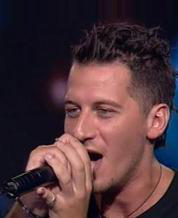

In [25]:
img = Image.open('/Users/lucio.nogales/Documents/Master-degree-projects/Pattern recognition project/data/celeba-dataset/img_align_celeba/' + celeba_dataset.iloc[random_person_index].name)
display(img)

# Saving the new dataset

In [26]:
celeba_dataset.to_pickle('/Users/lucio.nogales/Documents/Master-degree-projects/Pattern recognition project/data/celeba-dataset/dataset-attributes.pkl')

# Spliting up the dataset

In [11]:
training_set, temp_set = train_test_split(celeba_dataset, test_size=0.4, random_state=42)
validation_set, test_set = train_test_split(temp_set, test_size=0.5, random_state=42)

In [12]:
print('Training set', training_set.shape)
print('Test set', test_set.shape)
print('Val set', validation_set.shape)

Training set (121559, 40)
Test set (40520, 40)
Val set (40520, 40)


# Saving the datasets

In [14]:
training_set.to_pickle('/Users/lucio.nogales/Documents/Master-degree-projects/Pattern recognition project/data/celeba-dataset/train-dataset-attributes.pkl')
test_set.to_pickle('/Users/lucio.nogales/Documents/Master-degree-projects/Pattern recognition project/data/celeba-dataset/test-dataset-attributes.pkl')
validation_set.to_pickle('/Users/lucio.nogales/Documents/Master-degree-projects/Pattern recognition project/data/celeba-dataset/val-dataset-attributes.pkl')